In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline

In [77]:
#read the data
df1 = pd.read_csv('/Users/joasyepidan/Downloads/spring2022/ITSC4155/dataset/2018-2019 Stop Data PART 1.xlsx - 2018-2019 Pax Data.csv')
df2 = pd.read_csv('/Users/joasyepidan/Downloads/spring2022/ITSC4155/dataset/2018-2019 Stop Data PART 2.xlsx - Sheet1.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
##combine both dataset
frames = [df1,df2]
df = pd.concat(frames)
df

,Date,Time,Bus,Count,Onoff,Latitude,Longitude,Route,Stop,Longtitude
0,7/1/2018,0:00:19,2404,5,on,35.309483,-80.744125,Silver,CRI Deck,NaN
1,7/1/2018,0:07:27,2404,3,off,35.310318,-80.726677,Silver,Martin Hall,NaN
2,7/1/2018,0:09:19,2404,1,off,35.307224,-80.725281,Silver,Lot 5A,NaN
3,7/1/2018,0:13:31,2403,1,off,35.308022,-80.732727,Green,Cone Deck W,NaN
4,7/1/2018,0:16:05,2403,1,on,35.308022,-80.732727,Green,Cone Deck W,NaN
...,...,...,...,...,...,...,...,...,...,...
505195,6/30/2019,23:41:39,2401,1,on,35.311974,NaN,Silver,East Deck 2,-80.733345
505196,6/30/2019,23:44:25,2403,1,on,35.308067,NaN,Silver,Union Deck/Belk N,-80.732727
505197,6/30/2019,23:48:03,2401,1,off,35.309441,NaN,Silver,East Deck 2,-80.744110
505198,6/30/2019,23:49:43,2403,1,off,35.307194,NaN,Silver,Union Deck/Belk N,-80.725166


In [20]:
#check for null values
print(df.shape)
df.isna().sum()

(979692, 10)


Date               0
Time               0
Bus                0
Count              0
Onoff              0
Latitude        5863
Longitude     509847
Route              0
Stop             141
Longtitude    475708
dtype: int64

In [39]:
# i dont think we need the latitude and longitude columns because of the large amount of null values
# and also we can just look up a map of the bus itenaries 
print(df.shape)
df_clean = df.drop(['Latitude','Longitude'],axis=1)
df_clean.drop(['Longtitude'],axis=1, inplace=True)
df_clean.isna().sum()
print(df_clean.shape)

(979692, 10)
(979692, 7)


In [44]:
# drop null values
#print(df_clean.isna().sum())
df_clean = df_clean.dropna()
df_clean.isna().sum()

Date     0
Time     0
Bus      0
Count    0
Onoff    0
Route    0
Stop     0
dtype: int64

In [47]:
df_clean['Stop'].unique

<bound method Series.unique of 0                  CRI Deck
1               Martin Hall
2                    Lot 5A
3               Cone Deck W
4               Cone Deck W
                ...        
505195          East Deck 2
505196    Union Deck/Belk N
505197          East Deck 2
505198    Union Deck/Belk N
505199          East Deck 2
Name: Stop, Length: 979551, dtype: object>

In [67]:
df_clean['Route'].unique()

array(['Silver', 'Green', 'Gold', 'Campus Tour', 'Special Event 1',
       'Charter', 'Special Event 2', 'Football Shuttle'], dtype=object)

In [71]:
#take out only silver, green, and gold routes and store accordingly
routes = ['Silver', 'Green', 'Gold']
df_final = df_clean.loc[df_clean['Route'].isin(routes)]
df_final['Route'].unique()

array(['Silver', 'Green', 'Gold'], dtype=object)

In [62]:
silver = df_final.loc[df_clean['Route'] == 'Silver']
green = df_final.loc[df_clean['Route'] == 'Green']
gold = df_final.loc[df_clean['Route'] == 'Gold']
silver
green
gold

,Date,Time,Bus,Count,Onoff,Route,Stop
48,7/1/2018,10:18:02,2408,1,off,Gold,Student Union W
54,7/1/2018,10:31:20,2408,1,off,Gold,Student Union W
55,7/1/2018,10:32:17,2408,1,on,Gold,Student Union W
61,7/1/2018,10:44:24,2408,1,off,Gold,Union Deck/Belk N
63,7/1/2018,10:46:16,2408,1,on,Gold,Union Deck/Belk N
...,...,...,...,...,...,...,...
504103,6/28/2019,22:48:34,2410,1,on,Gold,Student Union W
504110,6/28/2019,23:01:13,2401,5,off,Gold,Student Union W
504122,6/28/2019,23:18:42,2410,1,off,Gold,Student Union W
504123,6/28/2019,23:21:14,2410,1,on,Gold,Student Union W


<AxesSubplot:>

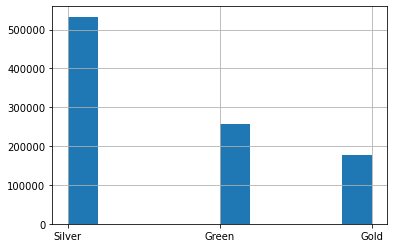

In [72]:
df_final['Route'].hist()

In [76]:
df_final.head()

,Date,Time,Bus,Count,Onoff,Route,Stop
0,7/1/2018,0:00:19,2404,5,on,Silver,CRI Deck
1,7/1/2018,0:07:27,2404,3,off,Silver,Martin Hall
2,7/1/2018,0:09:19,2404,1,off,Silver,Lot 5A
3,7/1/2018,0:13:31,2403,1,off,Green,Cone Deck W
4,7/1/2018,0:16:05,2403,1,on,Green,Cone Deck W


## after reflection I don't think we need Column "Bus" as well because it wouldn't affect our model, it is just full of buses id's
df_final = df_final.drop(['Bus'],axis=1)


In [84]:
df_final

,Date,Time,Count,Onoff,Route,Stop
0,7/1/2018,0:00:19,5,on,Silver,CRI Deck
1,7/1/2018,0:07:27,3,off,Silver,Martin Hall
2,7/1/2018,0:09:19,1,off,Silver,Lot 5A
3,7/1/2018,0:13:31,1,off,Green,Cone Deck W
4,7/1/2018,0:16:05,1,on,Green,Cone Deck W
...,...,...,...,...,...,...
505195,6/30/2019,23:41:39,1,on,Silver,East Deck 2
505196,6/30/2019,23:44:25,1,on,Silver,Union Deck/Belk N
505197,6/30/2019,23:48:03,1,off,Silver,East Deck 2
505198,6/30/2019,23:49:43,1,off,Silver,Union Deck/Belk N


In [87]:
#download clean data
df_final.to_csv(r'/Users/joasyepidan/Downloads/spring2022/ITSC4155/dataset/Clean_ninerTransit.csv')